In [1]:
import matplotlib.pyplot as plt
import os
os.chdir('D:\Simplilearn Goal\Machine Learning course\Demo Datasets\Lesson 4')

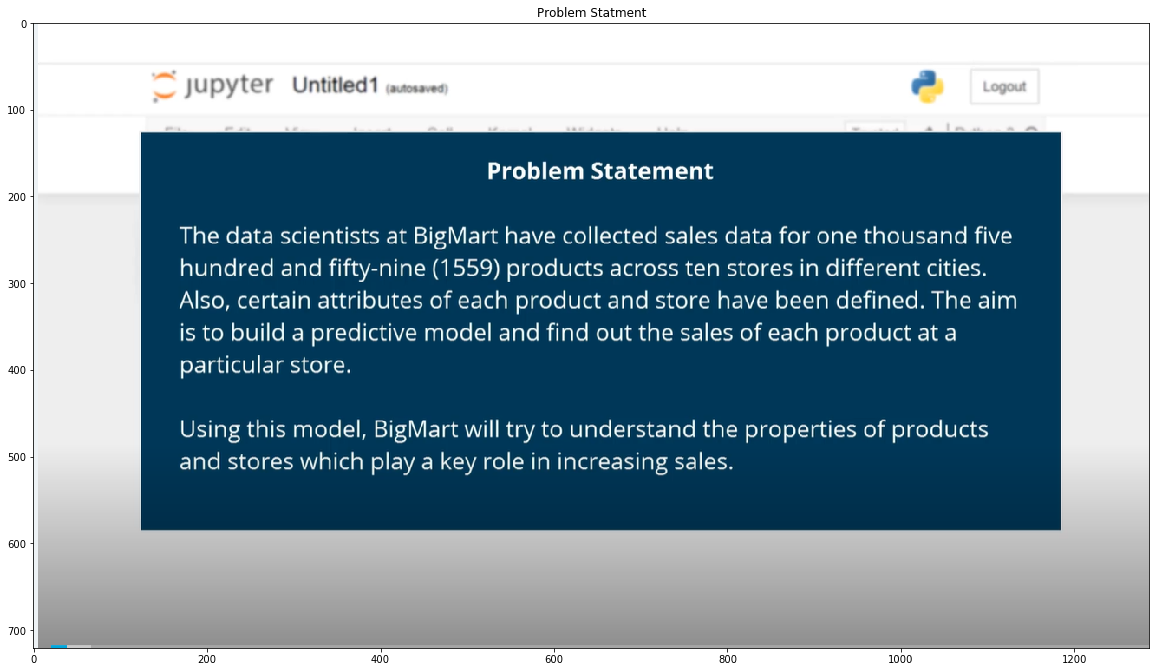

In [2]:
img=plt.imread('Bigmart.PNG')
plt.figure(figsize=(20,20))
plt.title('Problem Statment')
plt.imshow(img)

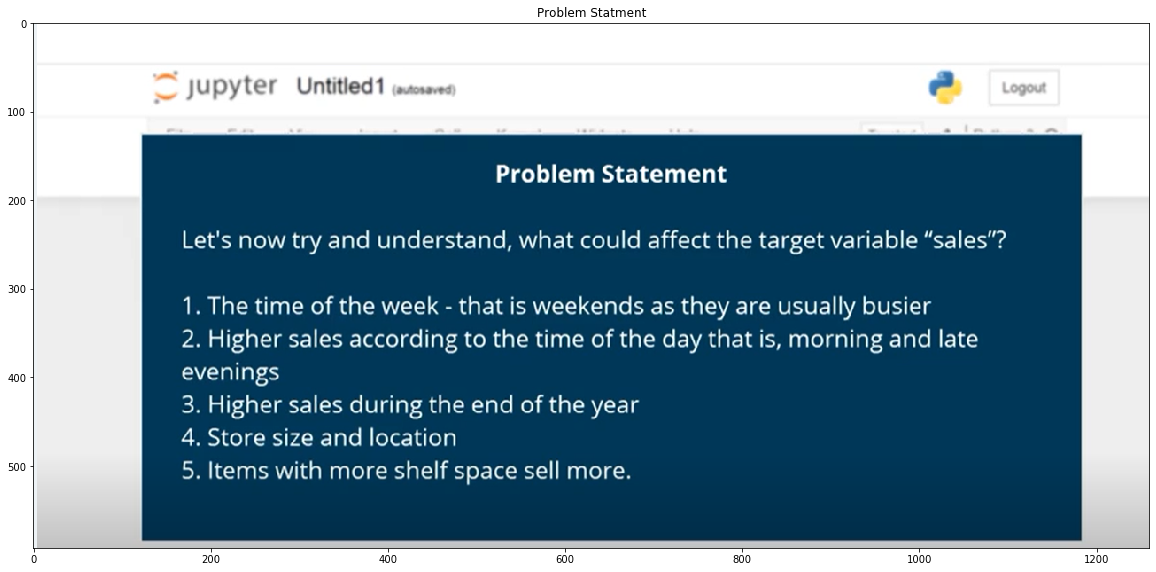

In [3]:
img=plt.imread('Problem statement.PNG')
plt.figure(figsize=(20,20))
plt.title('Problem Statment')
plt.imshow(img)

In [214]:
#import required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_squared_error
from math import sqrt

In [5]:
#import datasets
train_bigmart=pd.read_csv('bigmart_train.csv')

In [6]:
train_bigmart.info(verbose=True)
#Item_Identifier              
#Item_Fat_Content             
#Item_Visibility              
#Item_Type                    
#Outlet_Identifier  
#Outlet_Size
#Outlet_Location_Type         
#Outlet_Type                  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 566.0+ KB


In [7]:
train_bigmart['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [8]:
train_bigmart['Item_Type'].nunique()

16

In [9]:
print(train_bigmart['Outlet_Size'].unique())
print(train_bigmart['Outlet_Size'].mode())

['Medium' nan 'High' 'Small']
0    Medium
dtype: object


In [10]:
train_bigmart['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [11]:
train_bigmart['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [12]:
train_bigmart.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
train_bigmart.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [14]:
train_bigmart.Item_Weight.describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [15]:
train_bigmart.Outlet_Establishment_Year.unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [16]:
train_bigmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 566.0+ KB


In [17]:
#calculate the outlet age
train_bigmart['Outlet_age']=2018-train_bigmart['Outlet_Establishment_Year']
train_bigmart.Outlet_age.nunique()

9

In [18]:
train_bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,19
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,31


#fillna rules 
  ->if missing value is categorical fill the with most occurance value
  ->if Missing value is continous variable fill with the mean value


In [19]:
print(train_bigmart.Outlet_Size.unique())
print(train_bigmart.Outlet_Size.mode()[0])

['Medium' nan 'High' 'Small']
Medium


In [20]:
#Replace missing value for outlet_size
train_bigmart['Outlet_Size']=train_bigmart['Outlet_Size'].fillna(train_bigmart['Outlet_Size'].mode()[0])
train_bigmart['Outlet_Size'].unique() #check replace has been taken place or not

array(['Medium', 'High', 'Small'], dtype=object)

In [21]:
train_bigmart['Item_Weight'].isnull().sum()

1463

In [22]:
train_bigmart['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [23]:
train_bigmart['Item_Weight']=train_bigmart['Item_Weight'].fillna(train_bigmart['Item_Weight'].mean(),axis=0)

In [24]:
train_bigmart['Item_Weight'].isnull().sum()

0

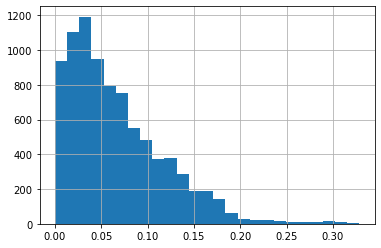

In [25]:
train_bigmart['Item_Visibility'].hist(bins=25)

In [26]:
train_bigmart['Item_Visibility'].describe(percentiles=[.25,.5,.75])

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

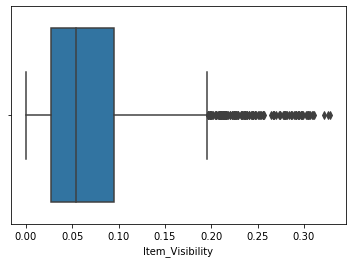

In [27]:
sns.boxplot(train_bigmart['Item_Visibility'])

(array([1215., 1424., 1359.,  970.,  928.,  635.,  511.,  468.,  332.,
         261.,  194.,   85.,   34.,   26.,   22.,   13.,   12.,   17.,
          14.,    3.]),
 array([0.        , 0.01641955, 0.03283909, 0.04925864, 0.06567819,
        0.08209774, 0.09851728, 0.11493683, 0.13135638, 0.14777593,
        0.16419547, 0.18061502, 0.19703457, 0.21345412, 0.22987366,
        0.24629321, 0.26271276, 0.27913231, 0.29555185, 0.3119714 ,
        0.32839095]),
 <a list of 20 Patch objects>)

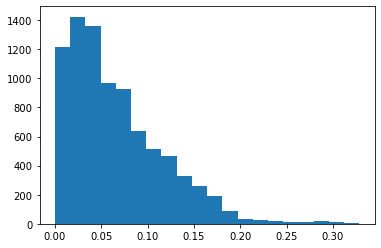

In [28]:
plt.hist(train_bigmart['Item_Visibility'],bins=20)

In [29]:
#removing the outliers
Q1=train_bigmart['Item_Visibility'].quantile(0.25)
Q3=train_bigmart['Item_Visibility'].quantile(0.75)
IQR=Q3-Q1

In [30]:
print(Q1)
print(Q3)
print(IQR)

0.026989477499999998
0.0945852925
0.067595815


In [31]:
#remove all the outliers which has item visibility greater than 0.20
filt=train_bigmart.query('(@Q1 - 1.5*@IQR) <= Item_Visibility <=(@Q3 + 1.5*@IQR)')
filt[filt['Item_Visibility']>0.2]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age


In [32]:
print(filt.shape)
print(train_bigmart.shape)

(8379, 13)
(8523, 13)


In [33]:
filt.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_age
count,8379.000000,8379.000000,8379.000000,8379.000000,8379.000000,8379.000000
mean,12.864794,0.063061,140.968471,1997.948443,2212.891704,20.051557
std,4.242004,0.046130,62.272255,8.352477,1703.559375,8.352477
min,4.555000,0.000000,31.290000,1985.000000,33.290000,9.000000
25%,9.300000,0.026789,93.794900,1987.000000,874.861200,14.000000
50%,12.857645,0.052729,142.915400,1999.000000,1830.950000,19.000000
75%,16.100000,0.092277,185.625300,2004.000000,3124.599400,31.000000
max,21.350000,0.195721,266.888400,2009.000000,13086.964800,33.000000


In [34]:
x=Q1-1.5*IQR
y=Q3+1.5*IQR
print(x)
print(y)

-0.07440424500000001
0.195979015


In [35]:
train_bigmart=filt
train_bigmart.shape , filt.shape

((8379, 13), (8379, 13))

In [36]:
train_bigmart[train_bigmart['Item_Visibility']>=0.2]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age


In [37]:
train_bigmart.isnull().sum() #Outliers removed, NA values updated

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Outlet_age                   0
dtype: int64

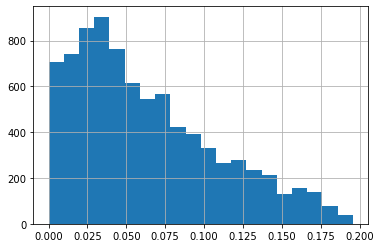

In [38]:
train_bigmart.Item_Visibility.hist(bins=20)

In [39]:
train_bigmart.shape

(8379, 13)

In [40]:
train_bigmart['Item_Visibility'].unique()

array([0.0160473 , 0.01927822, 0.01676007, ..., 0.03518627, 0.14522065,
       0.04487828])

In [41]:
#Replace the visibility mode

train_bigmart['Item_visbility_bins']=pd.cut(train_bigmart['Item_Visibility'],[0.000,0.065,0.13,0.2],labels=['Low Viz','Viz','High'])

In [42]:
train_bigmart['Item_visbility_bins'].isnull().sum()
train_bigmart['Item_visbility_bins'].mode()[0]

'Low Viz'

In [55]:
train_bigmart['Item_visbility_bins']=train_bigmart['Item_visbility_bins'].fillna(train_bigmart['Item_visbility_bins'].mode()[0])

In [56]:
train_bigmart.Item_visbility_bins.isnull().sum()

0

In [44]:
train_bigmart

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age,Item_visbility_bins
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,19,Low Viz
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9,Low Viz
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,19,Low Viz
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,20,NaN
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,31,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,31,Low Viz
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,16,Low Viz
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,14,Low Viz
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,9,High


In [45]:
#replacing all low Fat LF as Low Fat and Reg,regular as Regular
train_bigmart['Item_Fat_Content'].value_counts()

Low Fat    5016
Regular    2831
LF          307
reg         116
low fat     109
Name: Item_Fat_Content, dtype: int64

In [46]:
train_bigmart['Item_Fat_Content']=train_bigmart['Item_Fat_Content'].replace(['Low Fat','LF'],'Low Fat')

In [47]:
train_bigmart['Item_Fat_Content']=train_bigmart['Item_Fat_Content'].replace(['Regular','reg'],'Regular')

In [48]:
train_bigmart['Item_Fat_Content'].value_counts()

Low Fat    5323
Regular    2947
low fat     109
Name: Item_Fat_Content, dtype: int64

In [49]:
train_bigmart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8379 entries, 0 to 8522
Data columns (total 14 columns):
Item_Identifier              8379 non-null object
Item_Weight                  8379 non-null float64
Item_Fat_Content             8379 non-null object
Item_Visibility              8379 non-null float64
Item_Type                    8379 non-null object
Item_MRP                     8379 non-null float64
Outlet_Identifier            8379 non-null object
Outlet_Establishment_Year    8379 non-null int64
Outlet_Size                  8379 non-null object
Outlet_Location_Type         8379 non-null object
Outlet_Type                  8379 non-null object
Item_Outlet_Sales            8379 non-null float64
Outlet_age                   8379 non-null int64
Item_visbility_bins          7853 non-null category
dtypes: category(1), float64(4), int64(2), object(7)
memory usage: 695.6+ KB


In [50]:
#running lablel encoder model tranforming into the random binary values using label encoder fit model
le=LabelEncoder()

In [53]:
train_bigmart['Item_Fat_Content']=le.fit_transform(train_bigmart['Item_Fat_Content'])

In [54]:
train_bigmart

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age,Item_visbility_bins
0,FDA15,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,19,Low Viz
1,DRC01,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9,Low Viz
2,FDN15,17.500,0,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,19,Low Viz
3,FDX07,19.200,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,20,NaN
4,NCD19,8.930,0,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,31,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,31,Low Viz
8519,FDS36,8.380,1,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,16,Low Viz
8520,NCJ29,10.600,0,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,14,Low Viz
8521,FDN46,7.210,1,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,9,High


In [57]:
train_bigmart['Item_visbility_bins']=le.fit_transform(train_bigmart['Item_visbility_bins'])

In [58]:
train_bigmart['Outlet_Size']=le.fit_transform(train_bigmart['Outlet_Size'])

In [59]:
train_bigmart['Outlet_Location_Type']=le.fit_transform(train_bigmart['Outlet_Location_Type'])

In [61]:
train_bigmart['Outlet_Type']=le.fit_transform(train_bigmart['Outlet_Type'])

In [66]:
train_bigmart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8379 entries, 0 to 8522
Data columns (total 14 columns):
Item_Identifier              8379 non-null object
Item_Weight                  8379 non-null float64
Item_Fat_Content             8379 non-null int32
Item_Visibility              8379 non-null float64
Item_Type                    8379 non-null object
Item_MRP                     8379 non-null float64
Outlet_Identifier            8379 non-null object
Outlet_Establishment_Year    8379 non-null int64
Outlet_Size                  8379 non-null int32
Outlet_Location_Type         8379 non-null int32
Outlet_Type                  8379 non-null int32
Item_Outlet_Sales            8379 non-null float64
Outlet_age                   8379 non-null int64
Item_visbility_bins          8379 non-null int32
dtypes: float64(4), int32(5), int64(2), object(3)
memory usage: 720.1+ KB


In [68]:
dummies=pd.get_dummies(train_bigmart['Outlet_Type'])
dummies

,0,1,2,3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0
...,...,...,...,...
8518,0,1,0,0
8519,0,1,0,0
8520,0,1,0,0
8521,0,0,1,0


In [69]:
train_bigmart=pd.concat([dummies,train_bigmart],axis=1)

In [257]:
train_bigmart.drop(train_bigmart[0],inplace=True)

In [70]:
train_bigmart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8379 entries, 0 to 8522
Data columns (total 18 columns):
0                            8379 non-null uint8
1                            8379 non-null uint8
2                            8379 non-null uint8
3                            8379 non-null uint8
Item_Identifier              8379 non-null object
Item_Weight                  8379 non-null float64
Item_Fat_Content             8379 non-null int32
Item_Visibility              8379 non-null float64
Item_Type                    8379 non-null object
Item_MRP                     8379 non-null float64
Outlet_Identifier            8379 non-null object
Outlet_Establishment_Year    8379 non-null int64
Outlet_Size                  8379 non-null int32
Outlet_Location_Type         8379 non-null int32
Outlet_Type                  8379 non-null int32
Item_Outlet_Sales            8379 non-null float64
Outlet_age                   8379 non-null int64
Item_visbility_bins          8379 non-null int32


In [195]:
train_bigmart.rename(columns={'Grocery Store':'Grocery Store', 'Super market1':'Supermarket Type1', 'Super market2':'Supermarket Type2','Super market3':'Supermarket Type3'},inplace=True)

In [196]:
train_bigmart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8379 entries, 0 to 8522
Data columns (total 13 columns):
Grocery Store           8379 non-null uint8
Supermarket Type3       8379 non-null uint8
Supermarket Type2       8379 non-null uint8
Supermarket Type3       8379 non-null uint8
Item_Weight             8379 non-null float64
Item_Fat_Content        8379 non-null int32
Item_Visibility         8379 non-null float64
Item_MRP                8379 non-null float64
Outlet_Size             8379 non-null int32
Outlet_Location_Type    8379 non-null int32
Item_Outlet_Sales       8379 non-null float64
Outlet_age              8379 non-null int64
Item_visbility_bins     8379 non-null int32
dtypes: float64(4), int32(4), int64(1), uint8(4)
memory usage: 556.4 KB


In [140]:
train_bigmart.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type'],axis=1,inplace=True)

KeyError: "['Item_Identifier' 'Item_Type' 'Outlet_Identifier'\n 'Outlet_Establishment_Year' 'Outlet_Type'] not found in axis"

In [141]:
train_bigmart.columns

Index(['Grocery Store', 'Super market1', 'Super market2', 'Super market3',
       'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Item_Outlet_Sales',
       'Outlet_age', 'Item_visbility_bins'],
      dtype='object')

In [142]:
train_bigmart.head()

,Grocery Store,Super market1,Super market2,Super market3,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_age,Item_visbility_bins
0,0,1,0,0,9.30,0,0.016047,249.8092,1,0,3735.1380,19,1
1,0,0,1,0,5.92,1,0.019278,48.2692,1,2,443.4228,9,1
2,0,1,0,0,17.50,0,0.016760,141.6180,1,0,2097.2700,19,1
3,1,0,0,0,19.20,1,0.000000,182.0950,1,2,732.3800,20,1
4,0,1,0,0,8.93,0,0.000000,53.8614,0,2,994.7052,31,1


In [191]:
train_bigmart.isnull().sum()

Grocery Store           0
Super market1           0
Super market2           0
Super market3           0
Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Item_Outlet_Sales       0
Outlet_age              0
Item_visbility_bins     0
dtype: int64

In [197]:
#we can apply linear regression algorthim creating dependent and independent variable
x=train_bigmart.drop('Item_Outlet_Sales',axis=1)
y=train_bigmart['Item_Outlet_Sales']

In [198]:
x.columns

Index(['Grocery Store', 'Supermarket Type3', 'Supermarket Type2',
       'Supermarket Type3', 'Item_Weight', 'Item_Fat_Content',
       'Item_Visibility', 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_age', 'Item_visbility_bins'],
      dtype='object')

In [144]:
#preparing the test data
test_bigmart=pd.read_csv('bigmart_test.csv')

In [145]:
test_bigmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 332.9+ KB


In [101]:
test_bigmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  5681 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  5681 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 332.9+ KB


In [146]:
test_bigmart['Item_Weight']=test_bigmart['Item_Weight'].fillna(test_bigmart['Item_Weight'].mean())

In [173]:
test_bigmart['Outlet_Size']=test_bigmart['Outlet_Size'].fillna(test_bigmart['Outlet_Size'].mode()[0])

In [147]:
test_bigmart['Outlet_age']=2018-test_bigmart['Outlet_Establishment_Year']
test_bigmart.Outlet_age.nunique()

9

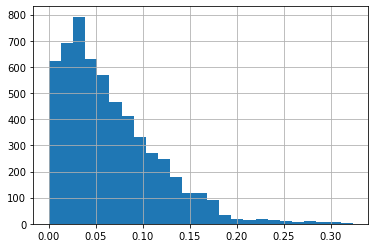

In [148]:
test_bigmart['Item_Visibility'].hist(bins=25)

In [149]:
Q1=test_bigmart['Item_Visibility'].quantile(0.25)
Q3=test_bigmart['Item_Visibility'].quantile(0.75)
IQR=Q3-Q1

In [150]:
print(Q1)
print(Q3)
print(IQR)

0.027046875
0.09346262300000001
0.06641574800000001


In [151]:
filt_test=test_bigmart.query('(@Q1 - 1.5*@IQR) <= Item_Visibility <=(@Q3 + 1.5*@IQR)')
filt_test[filt_test['Item_Visibility']>0.2]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_age


In [152]:
filt_test.shape,test_bigmart.shape

((5568, 12), (5681, 12))

In [153]:
test_bigmart=filt_test
test_bigmart.shape

(5568, 12)

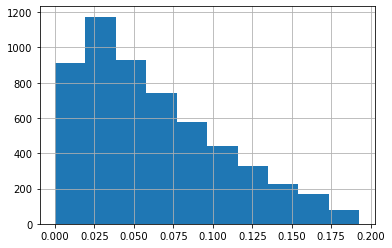

In [154]:
test_bigmart['Item_Visibility'].hist(bins=10)

In [155]:
test_bigmart['Item_visbility_bins']=pd.cut(test_bigmart['Item_Visibility'],[0.000,0.065,0.13,0.2],labels=['Low Viz','Viz','High'])

In [156]:
test_bigmart

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_age,Item_visbility_bins
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,19,Low Viz
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,11,Low Viz
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,20,Viz
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,11,Low Viz
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,33,Viz
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,21,Low Viz
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,9,High
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,16,Viz
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,11,NaN


In [157]:
test_bigmart['Item_visbility_bins'].isnull().sum()
test_bigmart['Item_visbility_bins'].mode()[0]

'Low Viz'

In [158]:
test_bigmart['Item_visbility_bins']=test_bigmart['Item_visbility_bins'].fillna(test_bigmart['Item_visbility_bins'].mode()[0])

In [159]:
test_bigmart['Item_visbility_bins'].value_counts()

Low Viz    3313
Viz        1726
High        529
Name: Item_visbility_bins, dtype: int64

In [160]:
test_bigmart['Item_Fat_Content'].value_counts()

Low Fat    3339
Regular    1890
LF          200
reg          74
low fat      65
Name: Item_Fat_Content, dtype: int64

In [161]:
test_bigmart['Item_Fat_Content']=test_bigmart['Item_Fat_Content'].replace(['Low Fat','LF'],'Low Fat')

In [162]:
test_bigmart['Item_Fat_Content']=test_bigmart['Item_Fat_Content'].replace(['Regular','reg'],'Regular')

In [163]:
#running lablel encoder model tranforming into the random binary values using label encoder fit model
le=LabelEncoder()

In [164]:
test_bigmart['Item_Fat_Content']=le.fit_transform(test_bigmart['Item_Fat_Content'])

In [169]:
test_bigmart['Item_visbility_bins']=le.fit_transform(test_bigmart['Item_visbility_bins'])

In [174]:
test_bigmart.Outlet_Size.isnull().sum()

0

In [175]:
test_bigmart['Outlet_Size']=le.fit_transform(test_bigmart['Outlet_Size'])

In [176]:
test_bigmart

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_age,Item_visbility_bins
0,FDW58,20.750000,0,0.007565,Snack Foods,107.8622,OUT049,1999,1,Tier 1,Supermarket Type1,19,1
1,FDW14,8.300000,1,0.038428,Dairy,87.3198,OUT017,2007,1,Tier 2,Supermarket Type1,11,1
2,NCN55,14.600000,0,0.099575,Others,241.7538,OUT010,1998,1,Tier 3,Grocery Store,20,2
3,FDQ58,7.315000,0,0.015388,Snack Foods,155.0340,OUT017,2007,1,Tier 2,Supermarket Type1,11,1
4,FDY38,12.695633,1,0.118599,Dairy,234.2300,OUT027,1985,1,Tier 3,Supermarket Type3,33,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,1,0.013496,Snack Foods,141.3154,OUT046,1997,2,Tier 1,Supermarket Type1,21,1
5677,FDD47,7.600000,1,0.142991,Starchy Foods,169.1448,OUT018,2009,1,Tier 3,Supermarket Type2,9,0
5678,NCO17,10.000000,0,0.073529,Health and Hygiene,118.7440,OUT045,2002,1,Tier 2,Supermarket Type1,16,2
5679,FDJ26,15.300000,1,0.000000,Canned,214.6218,OUT017,2007,1,Tier 2,Supermarket Type1,11,1


In [177]:
test_bigmart['Outlet_Location_Type']=le.fit_transform(test_bigmart['Outlet_Location_Type'])

In [178]:
test_bigmart['Outlet_Location_Type'].value_counts()

2    2176
1    1856
0    1536
Name: Outlet_Location_Type, dtype: int64

In [179]:
dummies_test=pd.get_dummies(test_bigmart['Outlet_Type'])
dummies_test

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,1,0,0
2,1,0,0,0
3,0,1,0,0
4,0,0,0,1
...,...,...,...,...
5676,0,1,0,0
5677,0,0,1,0
5678,0,1,0,0
5679,0,1,0,0


In [180]:
test_bigmart=pd.concat([dummies_test,test_bigmart],axis=1)

In [181]:
test_bigmart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5568 entries, 0 to 5680
Data columns (total 17 columns):
Grocery Store                5568 non-null uint8
Supermarket Type1            5568 non-null uint8
Supermarket Type2            5568 non-null uint8
Supermarket Type3            5568 non-null uint8
Item_Identifier              5568 non-null object
Item_Weight                  5568 non-null float64
Item_Fat_Content             5568 non-null int32
Item_Visibility              5568 non-null float64
Item_Type                    5568 non-null object
Item_MRP                     5568 non-null float64
Outlet_Identifier            5568 non-null object
Outlet_Establishment_Year    5568 non-null int64
Outlet_Size                  5568 non-null int32
Outlet_Location_Type         5568 non-null int32
Outlet_Type                  5568 non-null object
Outlet_age                   5568 non-null int64
Item_visbility_bins          5568 non-null int32
dtypes: float64(3), int32(4), int64(2), object(4),

In [182]:
test_bigmart.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Establishment_Year'],axis=1,inplace=True)

In [183]:
test_bigmart.columns

Index(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3', 'Item_Weight', 'Item_Fat_Content',
       'Item_Visibility', 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Outlet_age', 'Item_visbility_bins'],
      dtype='object')

In [184]:
x_test=test_bigmart

In [199]:
x.columns,x_test.columns

(Index(['Grocery Store', 'Supermarket Type3', 'Supermarket Type2',
        'Supermarket Type3', 'Item_Weight', 'Item_Fat_Content',
        'Item_Visibility', 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type',
        'Outlet_age', 'Item_visbility_bins'],
       dtype='object'),
 Index(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
        'Supermarket Type3', 'Item_Weight', 'Item_Fat_Content',
        'Item_Visibility', 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type',
        'Outlet_Type', 'Outlet_age', 'Item_visbility_bins'],
       dtype='object'))

In [201]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [202]:
x_train.shape,x_test.shape,y_test.shape,y_train.shape

((5865, 12), (2514, 12), (2514,), (5865,))

In [205]:
ln=LinearRegression()
ln.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [207]:
ln1=LinearRegression()
ln1.fit(x_test,y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [217]:
#Linear regression model
#Coefficent and inctercept
print("***Train****")
print(ln.coef_)
print("\n",ln.intercept_)

print('\nAccuracy of test data',ln.score(x_train,y_train))
#MSE and RMSE
print("\nTrain Mean sqr Errors")
print("Train Mean Sqaured errors",mean_squared_error(y_train,ln.predict(x_train)))
print("Root Train Mean Sqaured errors",sqrt(mean_squared_error(y_train,ln.predict(x_train))))


***Train****
[-1.66687544e+03  2.10077620e+02 -1.50358788e+02  1.60715661e+03
 -1.00473408e+01  9.23789452e+01 -5.77525284e+02  1.53578569e+01
  2.06734348e+01 -1.13553969e+01 -1.12575871e+00 -1.71388520e+01]

 70.86008793731298

Accuracy of test data 0.5571462645583952

Train Mean sqr Errors
Train Mean Sqaured errors 1308123.3548934727
Root Train Mean Sqaured errors 1143.7322041865712


In [218]:
print("***Test****")
print(ln1.coef_)
print("\n",ln1.intercept_)

print('\nAccuracy of test data',ln1.score(x_test,y_test))
#MSE and RMSE
print("\nTest Mean sqr Errors")
print("Test Mean Sqaured errors",mean_squared_error(y_test,ln1.predict(x_test)))
print("Root Test Mean Sqaured errors",sqrt(mean_squared_error(y_test,ln1.predict(x_test))))

***Test****
[-1.66687544e+03  2.10077620e+02 -1.50358788e+02  1.60715661e+03
 -1.00473408e+01  9.23789452e+01 -5.77525284e+02  1.53578569e+01
  2.06734348e+01 -1.13553969e+01 -1.12575871e+00 -1.71388520e+01]

 70.86008793731298

Accuracy of test data 0.552094798305427

Test Mean sqr Errors
Test Mean Sqaured errors 1241208.690805493
Root Test Mean Sqaured errors 1114.0954585696384
